In [15]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno


In [16]:
import warnings

dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# warnings.filterwarnings(action='ignore')
DATA_PATH = '/opt/ml/input/data/train_data.csv' 
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

In [17]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


# Test ----- AnswerCode

In [18]:
def percentile(s):
    return np.sum(s) / len(s)

In [19]:
test_groupby = df.groupby('testId').agg({
    'userID': 'count',
    'answerCode': 'mean'
})
test_groupby

,userID,answerCode
testId,,
A010000001,1585,0.926183
A010000002,1550,0.931613
A010000003,1615,0.846440
A010000004,1540,0.883117
A010000005,1595,0.855172
...,...,...
A090000070,344,0.418605
A090000071,360,0.336111
A090000072,270,0.418519


/tmp/ipykernel_72314/4199184374.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


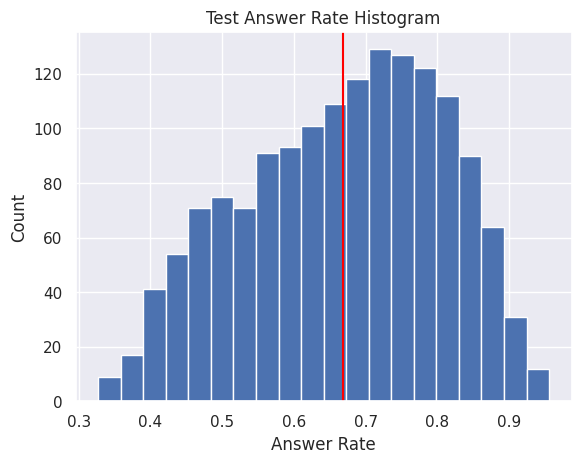

In [20]:
fig, ax = plt.subplots()
test_groupby['answerCode'].hist(bins=20)
ax.set_title('Test Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(test_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

# Tag ----- AnswerCode

In [21]:
correct_t = df.groupby(['testId'])['answerCode'].agg(['mean', 'sum'])
correct_t

,mean,sum
testId,,
A010000001,0.926183,1468
A010000002,0.931613,1444
A010000003,0.846440,1367
A010000004,0.883117,1360
A010000005,0.855172,1364
...,...,...
A090000070,0.418605,144
A090000071,0.336111,121
A090000072,0.418519,113


In [22]:
tag_groupby = df.groupby('KnowledgeTag').agg({
    'userID': 'count',
    'answerCode': percentile
})
tag_groupby.describe()

,userID,answerCode
count,912.000000,912.000000
mean,2485.291667,0.615524
std,1732.086925,0.148329
min,44.000000,0.188940
25%,1025.250000,0.498239
50%,2204.000000,0.599585
75%,4052.750000,0.740288
max,12892.000000,0.977778


/tmp/ipykernel_72314/2977806577.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


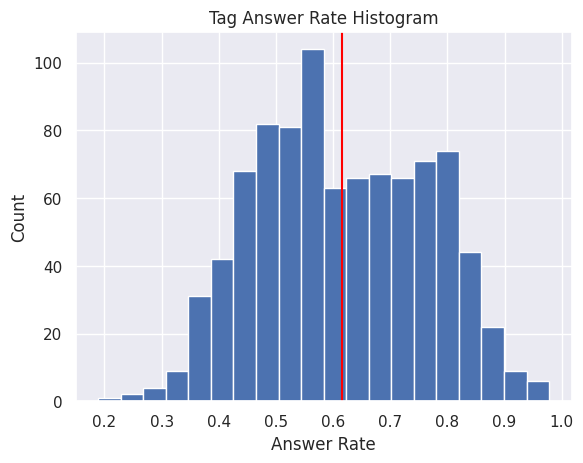

In [23]:
fig, ax = plt.subplots()
tag_groupby['answerCode'].hist(bins=20)
ax.set_title('Tag Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(tag_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

# elapsed

In [24]:
np.random.seed(7)

edu_df = pd.DataFrame({'user': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'C'],
                       'content': ['1', '2', '3', '1', '2', '1', '1', '1', '2', '1', '1', '1'],
                       'time': [22, 19, 27, 15, 11, 33, 10, 30, 40, 35, 12, 5],
                       'timestamp': sorted([pd.Timestamp(2021, 1, np.random.randint(1, 30), np.random.randint(10, 15), 30, 7).timestamp() for _ in range(12)]),
                       'correct': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]})
edu_df
edu_agg_df = edu_df.copy()

# 평균 (mean) / 표준 편차 (std)
agg_df = edu_agg_df.groupby('user').agg(['mean', 'std'])

# mapping을 위해 pandas DataFrame을 dictionary형태로 변환
agg_dict = agg_df.to_dict()

# 구한 통계량을 각 사용자에게 mapping
for k, v in agg_dict.items():
    # feature 이름
    feature_name = "_".join(k)
    
    # mapping이후 새로운 feature 추가
    edu_agg_df[feature_name] = edu_agg_df['user'].map(v)

edu_agg_df

,user,content,time,timestamp,correct,content_mean,content_std,time_mean,time_std,timestamp_mean,timestamp_std,correct_mean,correct_std
0,A,1,22,1.609508e+09,1,2462.4,0.836660,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
1,A,2,19,1.610026e+09,0,2462.4,0.836660,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
2,A,3,27,1.610116e+09,1,2462.4,0.836660,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
3,A,1,15,1.610807e+09,1,2462.4,0.836660,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
4,A,2,11,1.610894e+09,1,2462.4,0.836660,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
5,B,1,33,1.611153e+09,0,5.5,0.000000,21.5,16.263456,1.611322e+09,239284.934754,0.5,0.707107
6,B,1,10,1.611491e+09,1,5.5,0.000000,21.5,16.263456,1.611322e+09,239284.934754,0.5,0.707107
7,C,1,30,1.611657e+09,0,2422.2,0.447214,24.4,15.142655,1.611733e+09,116096.511575,0.8,0.447214
8,C,2,40,1.611664e+09,1,2422.2,0.447214,24.4,15.142655,1.611733e+09,116096.511575,0.8,0.447214
9,C,1,35,1.611668e+09,1,2422.2,0.447214,24.4,15.142655,1.611733e+09,116096.511575,0.8,0.447214


In [25]:
correct_k = df.groupby(['KnowledgeTag'])['answerCode'].agg(['mean', 'sum', 'std'])
correct_k.columns = ["tag_mean", 'tag_sum', 'tag_std']
correct_k

,tag_mean,tag_sum,tag_std
KnowledgeTag,,,
23,0.584444,1052,0.492954
24,0.614525,220,0.487388
25,0.858696,79,0.350244
26,0.614309,1494,0.486858
30,0.536178,289,0.499153
...,...,...,...
11253,0.739374,3166,0.439027
11265,0.676211,307,0.468437
11269,0.557716,1348,0.496760


0.14752267422331472

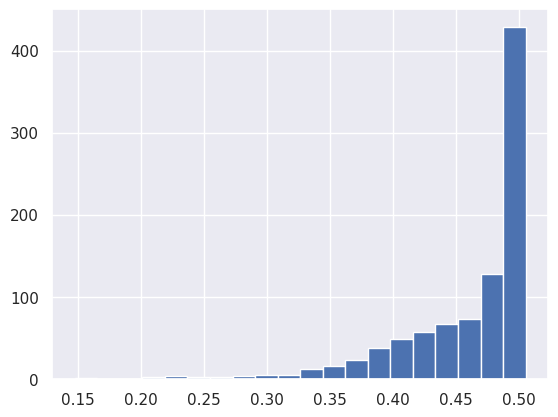

In [26]:
fig, ax = plt.subplots()
correct_k['tag_std'].hist(bins=20, ax = ax)
correct_k['tag_std'].min()
# 역으로 해서 난이도에 가중치를 주자
# 난이도 계산 방법

# test, tag, 문항별 category 난이도

* 평균과 분산을 곱하는 이유?
* 정답률이 낮은데, 분산도 낮다? -> 해당 tag, test가 어렵고, 보통 다 틀린다는 의미, 난이도 높음 
* 정답률이 낮은데, 분산이 높다? -> 해당 tag, test가 어렵게 푸는 애도 있고, 쉽게 푸는 애도 있다, 난이도 보통 
* 정답률이 높은데, 분산이 높다? -> 해당 tag, test가 어렵게 푸는 애도 있고, 쉽게 푸는 애도 있다, 난이도 보통 
* 반대로, 정답률이 높은데, 분산이 낮다? -> 해당 tag, test 다 쉽게 품, 난이도 쉬움

-> Quarter 이용해서 1,2,3,4 로 범주화시켜서 FE적용

In [38]:
(correct_k['tag_mean'] *  correct_k['tag_std']).describe()

count    912.000000
mean       0.277325
std        0.046065
min        0.074134
25%        0.247209
50%        0.289005
75%        0.317636
max        0.328145
dtype: float64

In [ ]:
correct_k['tag_level'] = correct_k['tag_mean'] *  correct_k['tag_std']

In [32]:
correct_t = df.groupby(['testId'])['answerCode'].agg(['mean', 'sum','std'])
correct_t.columns = ["test_mean", 'test_sum', 'test_std']

0.5010797307567574

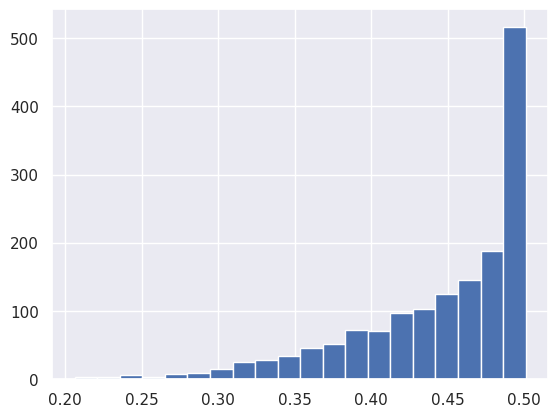

In [36]:
fig, ax = plt.subplots()
correct_t['test_std'].hist(bins=20, ax = ax)
correct_t['test_std'].max()

In [39]:
df['category_2'] = df['assessmentItemID'].str[2].astype(int)

In [40]:
correct_q = df.groupby(['category_2'])['answerCode'].agg(['mean', 'sum','std'])
correct_q.columns = ["test_mean", 'test_sum', 'test_std']

In [46]:
correct_q

,test_mean,test_sum,test_std
category_2,,,
1,0.800876,217904,0.399342
2,0.737593,197916,0.439944
3,0.702238,192246,0.457275
4,0.684056,182864,0.464891
5,0.658208,181516,0.474311
6,0.709232,187545,0.454118
7,0.521876,145689,0.499522
8,0.502598,123808,0.499994
9,0.449948,53717,0.497491
